파이썬 머신러닝 완벽가이드 p175~p227

## 06 피마 인디언 당뇨병 예측

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data=pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- 전체 768개의 데이터 중 Negative 값 0이 500개, Positive 값 1이 268개임.

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- null값은 없다.
- 피처의 타입은 모두 숫자형
- 임신 횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징으로 볼 때 별도의 피처 인코딩은 필요하지 않아 보인다.

In [ ]:
# 이전 파일에서 정의한 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 칼럼으로 레이블 값임, 칼럼 위치 -1을 이용해 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 이전 파일에서 정의한 함수
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()

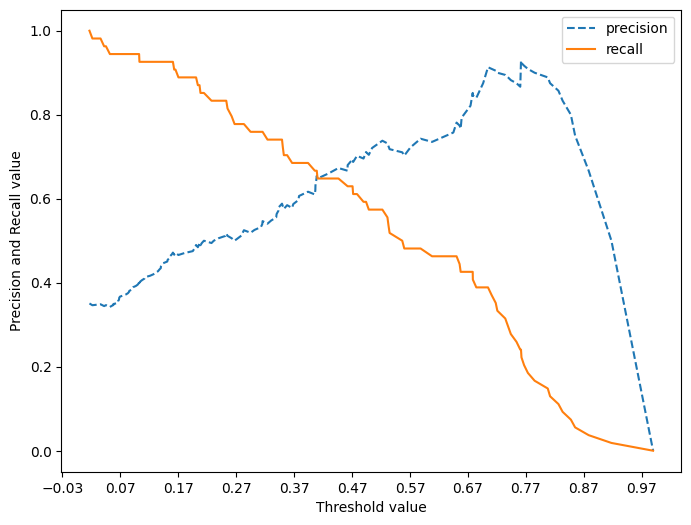

In [ ]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 재현율 곡선을 보면 임계값을 0.42정도로 낮추면 정밀도와 재현율이 어느정도 균형이 맞을 것 같다.
- 그러나 여전히 두 지표의 값이 낮다. (0.7이 안됨)

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min이 0으로 돼있는 피처가 많다. 말이 되지 않는다.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

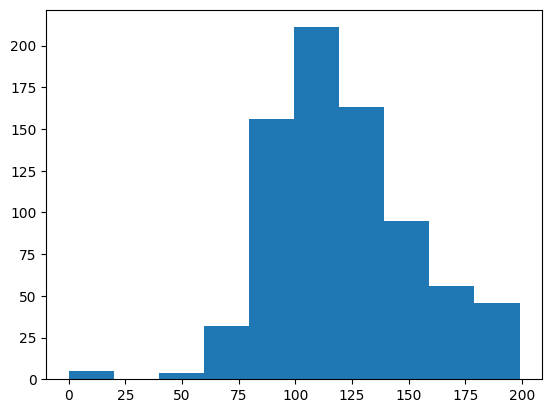

In [ ]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
  zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
  print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count,
                                                      100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


- SkinThickness와 Insulin의 0 값은 각각 전체의 29.56%, 48.7%로 대단히 많다.
- 전체 데이터 건수가 많지 않기 때문에 이들 데이터를 일괄적으로 삭제할 경우에는 학습을 효과적으로 수행하기 어렵다.
- 따라서 0을 평균값으로 대체한다.

In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0 값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [ ]:
# 피터 스케일링, 학습/테스트 데이터 세트로 나누기, 로지스틱 회귀를 적용해 성능 평가 지표 확인
# 로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 좋다.

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- 데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선되었다.

In [ ]:
# 이전 파일에서 정의한 함수
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_tst, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615, AUC: 0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774, AUC: 0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667, AUC: 0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667, AUC: 0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792, AUC: 0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857, AUC: 0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


- 정확도와 정밀도를 희생하고 재현율을 높이는데 가장 좋은 임곗값은 0.33이고 재현율 값이 0.7693이다. 하지만 정밀도가 0.5972로 매우 저조해졌으니 극단적인 선택이다.
- 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값으로 보인다.

In [ ]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433


## 정리

이진 분류의 레이블 값이 불균형하게 분포될 경우 단순히 예측 결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝 모델의 예측 성능을 평가할 수 없다.

1. 오차 행렬
- Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가
- 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있다.

2. 정밀도, 재현율
- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 재현율 : P->N으로 예측하면 문제임

3. F1 스코어
- 정밀도와 재현율을 결합한 평가 지표
- 둘 중 어느 한쪽으로 치우치지 않을 때 높은 지표값을 가짐.
- ROC-AUC : 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표
- AUC : ROC 곡선 밑의 면적을 구함. 1에 가까울수록 좋음.



---



# 04 분류

## 01 분류(Classification)의 개요
- 지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식.

1. 분류
- 지도 학습의 대표적인 유형
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것.
- 즉, 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블로 판별하는 것.
- 다양한 알고리즘으로 구현 가능하다.
> - 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
>- 선형 관계성에 기반한 로지스틱 회귀
>- 데이터균일도에 따른 규칙 기반의 결정트리
>- 개별 클래스 간의 최대 분류 마진을 찾아주는 서포트 벡터 머신
>- 최소 근접 알고리즘
>- 심층 연결 기반의 신경망
>- 머신러닝 알고리즘을 결합한 앙상블

2. 앙상블 방법
- 서로 다른/같은 알고리즘을 결합한다. (대부분 동일한 알고리즘 결합)
- 매우 많은 여러개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하며 예측 성능을 향상시킨다.
-  분류에서 각광을 받는 방법 중 하나
- 높은 예측 성능으로 선호됨.
- 배깅과 부스팅으로 나뉜다.
- 랜덤 포레스트
> - 대표적인 배깅 방식
> - 뛰어난 예측 성능, 빠른 수행 시간, 유연성
- 그래이언트 부스팅
> - 부스팅의 효시
> - 뛰어난 예측성능, 시간 오래걸림
> - Xgboost, LightGBM 등으로 발전
- 결정 트리
>- 쉽고 유연함
>- 데이터의 스케일링나 정규화 등의 사전 가공의 영향이 매우 적음
>- 과적합이 발생해 성능이 저하될 수도 있음
>- 이러한 단점은 앙상블 기법에서는 오히려 장점으로 작용. (좋은 약한 학습기)





## 02 결정 트리
- 머신러닝 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만든다.
- if/else을 자동으로 찾아내 예측을 위한 규치글 만드는 알고리즘으로 이해할 수 있다.
- 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다.



결정 트리의 구조
- 규칙 노드(Decision Node) : 규칙 조건
- 리프 노트(Lead Node) : 결정된 클래스 값
- 서브 트리(Sub Tree) : 새로운 규칙 조건마다 생성


 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐.
 - 많은 규칙이 있음 -> 분류를 결정하는 방식이 복잡해짐 -> 과적합으로 이어진다
 - 즉, 트리의 깊이가 깊어질수록 트리의 예측 성능이 저하될 가능성이 높음.


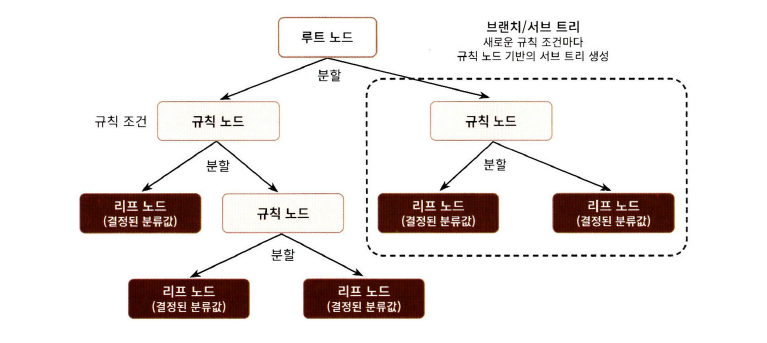

트리를 어떻게 분할할 것인가
- 최대한 균일한 데이터 세트를 구성하도록 분할


균일도
- 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.
- 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

정보의 균일도를 측정하는 대표적 방법
- 정보 이득
>- 엔트로피 개념 기반,
>- 1-엔트로피 지수
>- 정보 이득이 높은 속성을 기준으로 분할
>- 정보 이득이 높은 속성을 기준으로 분할
- 지니계수
>- 경제학에서 불평들 지수를 나타낼 때 사용하는 계수
>- 지니 계수가 낮은 속성을 기준으로 분할
>- 0이 평등, 1이 불평등
>- DecisionTreeClassifier에서 기본으로 사용

결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 측정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

### 01) 결정 트리 모델의 특징
- 장점1 : 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다. 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고 시각화 표현까지 가능하다.
- 장점2 : 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없다.
- 단점 : 과적합으로 정확도가 떨어진다. -> 극복을 위해 트리의 크기를 사전에 제한하는 튜닝 필요.

###  02) 결정 트리 파라미터
- 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스 제공
- DecisionTreeClassifier : 분류 를위한 클래스
- DecisionTreeRegressor : 회귀를 위한 클래스
- 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees)알고리즘 기반이다.
- CART는 분류뿐만 아니라 회귀에서도 사용될 수 있는 트리 알고리즘이다.
- DecisionTreeClassifier와 DecisionTreeRegressor 은 동일한 파라미터를 사용한다.


파라미터
1. min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수
- 과적합 제어에 사용
-  디폴트는 2
- 작게 설정할수록 분할되는 노드 많아져 과적합 가능성 증가

2. min_samples_leaf
- 말단 노드가 되기 위한 최소한의 샘플 데이터 수
- 과적한 제어 용도
- 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우 작게 설정 필요.

3. max_features
- 최적 분할을 위해 고려할 최대 피처 개수
- 디폴트는 None : 모든 피처를 사용해 분할 수행
- int 형으로 지정 : 대상 피처의 개수
- float 형으로 지정 : 전체 피처 중 대상 피처의 퍼센트
- sqrt, auto : 전체 피처 중 sqrt(전체 피처 개수)만큼 선정
- log : log2(전체 피처 개수)만큼 선정

4.  max_depth
- 트리의 최대 깊이 규정
- 디폴트는 None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킨다.
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요.

5. max_leaf_nodes
- 말단 노드의 최대 개수

### 03) 결정 트리 모델의 시각화
- Graphviz 패키지를 사용한다.
- 원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시작화할 수 있는 패키지이다.
- 사이킷런은 exort_graphviz() API 제공

In [18]:
pip install graphviz

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붓꽃 데이터를 로딩, 학습 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [20]:
from sklearn.tree import export_graphviz

#export_graohviz() 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,  feature_names=iris_data.feature_names, impurity=True, filled = True)

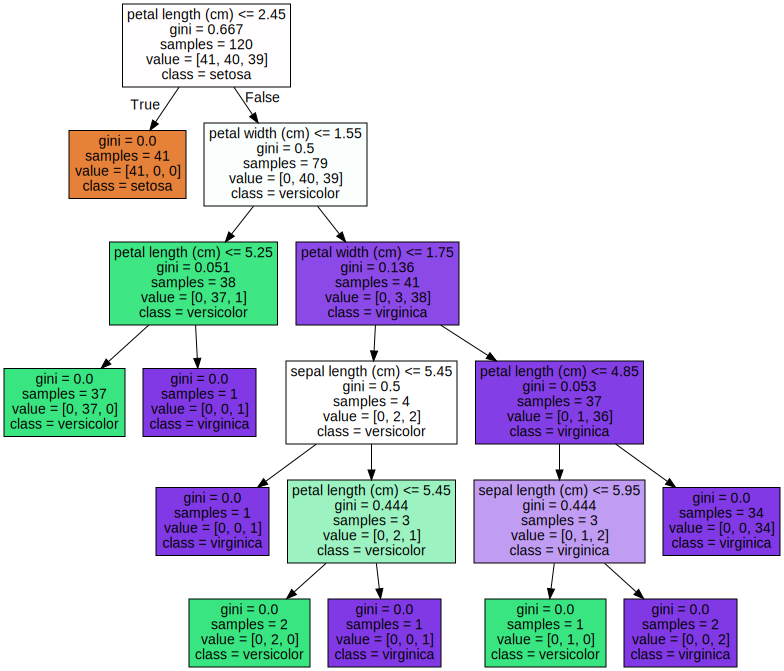

In [21]:
import graphviz

#위에서 생성된 tree.dot 파일 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

- 출력된 결과를 보면 각 규칙에 따라 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 한눈에 볼 수 있다
- 리프노드 : 더이상 자식 노드가 없는 노드, 최종 클래스 값이 결정되는 노드
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 형 규칙에 해당하는 데이터 건수
- value=[]는 클래스 값 기반의 데이터 건수

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 좀 더 간결하고 이상치에 강한 모델을 만들 수 있기 때문이다. 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 featrue_importance_ 속성을 제공한다.

featrue_importance_
- ndarray 형태로 값을 반환
- 피처 순서대로 값이 할당, 값이 높을수록 해당 피처의 중요도가 높다.

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

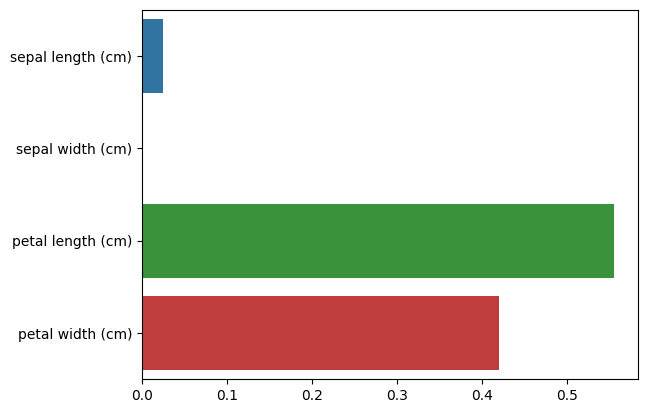

In [22]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

#feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

- 여러 피처들 중 petal_length가 가장 피처 중요도가 높음을 알 수 있다.

### 04) 결정 트리 과적합(Overfitting)
- 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 make_classification() 함수를 제공

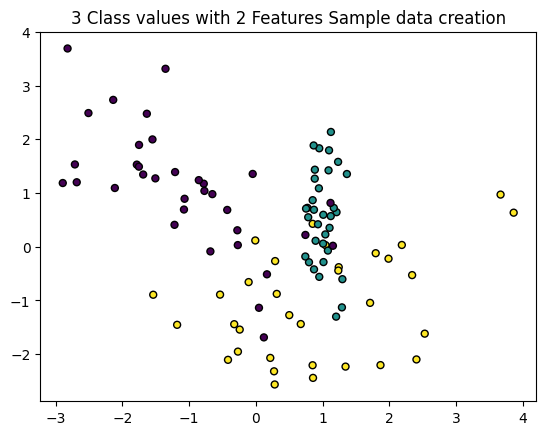

In [23]:
# 2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 그래프 형태로 시각화

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

결정트리의 하이퍼 파라미터를 디폴트 한 뒤, 어떤 결정 기준을 가지고 분할하는지 확인
- visualize_boundary()를 사용

In [24]:
import numpy as np

### Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
  fig,ax = plt.subplots()

  # 학습 데이터를 scatter plot으로 나타내기
  ax.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = 'rainbow', edgecolor = 'k',
             clim = (y.min(), y.max()), zorder = 3)
  ax.axis('tight')
  ax.axis('off')
  xlim_start, xlim_end = ax.get_xlim()
  ylim_start, ylim_end = ax.get_ylim()

  # 호출 파라미터로 들어온 train 데이터로 model 학습
  model.fit(X, y)

  # meshgrid 형태인 모든 좌표값으로 예측 수행
  xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num = 200),
                       np.linspace(ylim_start, ylim_end, num = 200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

  # contourf()를 이용하여 class boundary를 visualization
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                         levels = np.arange(n_classes + 1) - 0.5,
                         cmap = 'rainbow', clim = (y.min(), y.max()),
                         zorder = 1)

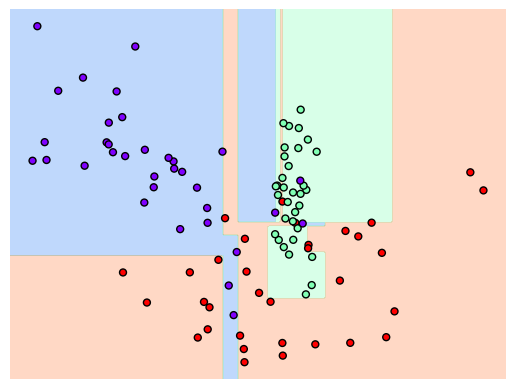

In [25]:
from sklearn.tree import DecisionTreeClassifier

#특정 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아짐.
- 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어진다.

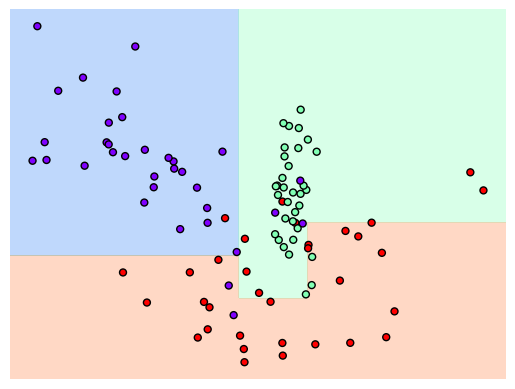

In [26]:
#min_samples_lear=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음.

### 05 )결정 트리 실습 - 사용자 행동 인식 데이터 세트
- 결정 트리를 이용해 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류 수행.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/features.txt',sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 : ',feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체 움직임 관련 속성의 평균/표준편차가 X,Y,Z 축 값으로 돼 있음

In [29]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 42개의 피처명이 중복되어있음

In [30]:
# 중복된 피처명 변경 함수 정의
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)

    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [31]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/features.txt',sep='\s+',\
                             header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_Df()를 이용, 신규 피처명은 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
    x_train = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/ESAA/23-2/자료/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame
    return x_train, x_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [34]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 7352개의 레코드, 561개의 피처, float 형의 숫자형 데이터이므로 인코딩 수행x

In [35]:
# 레이블 분포 확인
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [36]:
# DecisionTreeClassifier로 동작 예측 분류 수행 후 하이퍼파라미터 전부 추출
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n',dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 약 85%의 정확도

In [37]:
# 트리의 깊이가 예측 정확도에 주는 영향 -> GridSearchCV를 이용해 확인
# cv:교차검증 5세트
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 16}


GridSearchCV 객체의 cv_results_ 속성을 통해 max_depth 값에 따라 어떻게 예측 성능이 변했는지 살펴보기
- cv_results_ 속성은 CV 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있음.

In [38]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- max_depth가 8일때 정확도가 정점이다.
- 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올진 모르지만 검증 데이터 세트에서 오히려 과적합으로 성능 저하를 유발한다.


In [41]:
# 별도의 테스트 데이터 세트에서 결정 트리 정확도 측정
max_depths=[6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


- max_depth 가 8일 때 정확도가 가장 높음.
- 결정 트리는 깊이가 깊어질수록 과적함의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야 한다.

In [43]:
# max_depth와 min_samples_split를 변경하며 정확도 성능 튜닝
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
    }

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- max_depth가 8, min_samples_split가 16일 때 가장 정확도가 높다.

In [44]:
# best_estimator_ : 최적 파라미터로 학습이 완료된 Estimator 객체.
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


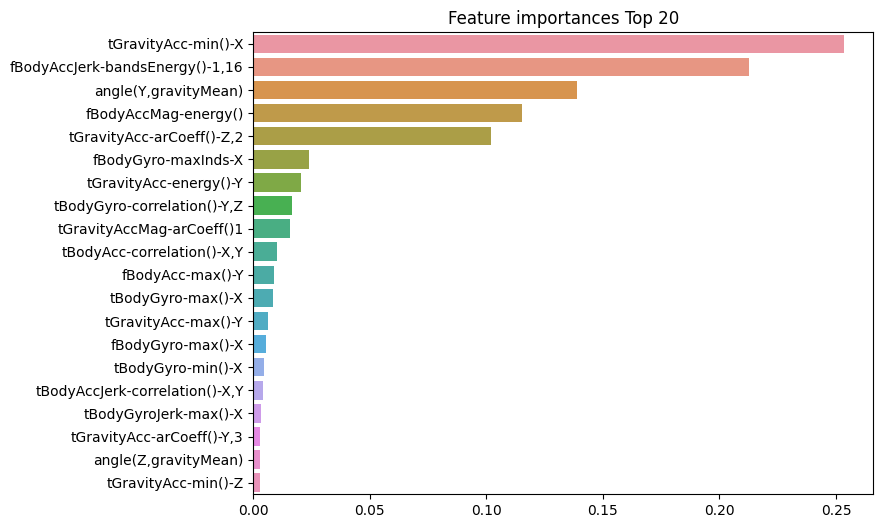

In [46]:
# feature_importances_ 속성 : 결정 트리에서 각 피처의 중요도를 나타냄
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 03 앙상블 학습

### 01) 앙상블 학습 개요
앙상블학습을 통한 분류
- 여러개의 분류기를 생성하여 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법.
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는다.
- 정형 데이터 분류에서 뛰어난 성능을 나타냄.


앙상블 분류 학습 유형
1. 보팅, 배깅
- 보팅, 배깅 : 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정.
-  보팅은 다른 알고리즘을 가진 분류기를 결합하지만 배깅은 같은 알고리즘을 가진 분류기 결합하며 데이터 샘플링을 서로 다르게 가져가(부트스트래핑 분할 방식) 학습한다.
- 배깅은 데이터 세트 간에 중첩 허용
- 랜덤포레스트는 배깅
2. 부스팅
- 부스팅은 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에는 가중치를 부여하며 학습과 예측을 진행
- 그래디언트 부스트, XGBoost, LightGMBM
3. 스태킹
- 여러 가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 대학습 시켜 결과를 예측하는 방법



### 02) 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
1. 하드 보팅
- 다수결 원칙과 비슷
- 다수의 분류기가 결정한 예측값을 최종 보팅 결괏값으로 선정
2. 소프트 보팅
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정한다.
- 일반적으로 소프트 보팅 적용

### 03) 보팅 분류기
- VotingClassifier 클래스 제공

In [47]:
# 데이터 살펴보기
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기
- VotingClassifier 의 주요 생성 인자
1. estimators : 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받음.
2. voting : 하드보팅 vs 소프트 보팅 방식 적용, 기본은 hard

In [48]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅 분류기가 정확도가 조금 높게 나타남.
- 앙상블 방법은 전반적으로 다른 단일 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다. (항상 뛰어난 것은 아님)
- 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에 끌어낼 수 있다.

## 04 랜덤 포레스트

### 01) 랜덤 포레스트의 개요 및 실습
- 배깅의 대표적인 알고리즘
- 빠른 수행 속도, 높은 예측 성능
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.
- 부트 스트래핑 분할 방식 : 여러 개의 데이터 세트를 중첩되게 분리하는 것
- Bagging = bootstrap aggregating
- 이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤포레스트임.

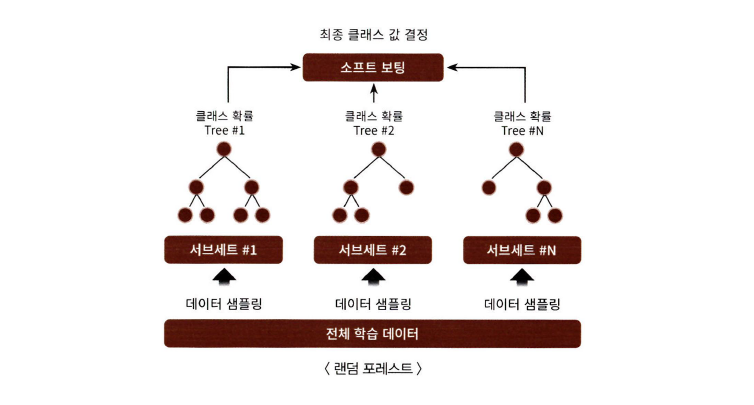

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 02) 랜덤 포레스트 하이퍼 파라미터 및 튜닝
트리기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고 튜닝을 위한 시간이 소모된다는 것.
1. n_estimators
- 랜덤 포레스트에서 결정 트리의 개수를 지정
- default는 10개
- 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아니다.
- 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 함.

2. max_features
- 결정 트리에 사용된 max_features 파라미터와 같음.
- 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라 'auto', 즉 'sqrt'와 같음.
- 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조함

3. max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있음

In [50]:
# GridSearchCV를 이용하기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# n_jobs=-1: 모든 CPU 코어를 이용해 학습
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [51]:
# n_estimators=300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 학습
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9165


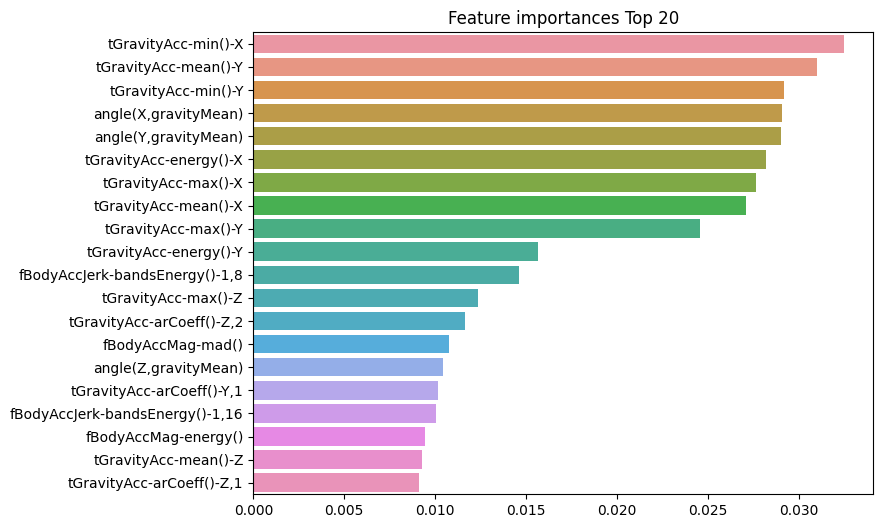

In [52]:
# 피처 중요도를 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 05 GBM(Gradient Boosting Machine)

### 01) GBM의 개요 및 실습
- 부스팅 알고리즘 :  여러개의 약한 학습기를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- AdaBoost와 그래디언트 부스트가 있다.

- AdaBoost
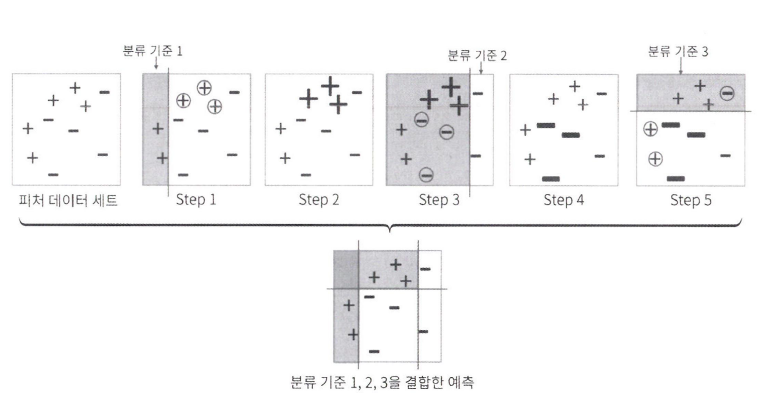

- GBM도 에이다 부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용한 것이 큰 차이이다.


 경사 하강법(Gradient Decent)
 - 피처에 기반한 예측 함수를 F(x)라 하자.
 - 오류식 h(x) = y - F(x)
 - 이 오류식을 최소화 하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것
 - 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법으로 이해.
 - CART 기반의 다른 알고리즘과 마찬가리고 분류, 회귀 모두 가능하다.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 1117.1초


- 기본 하이퍼 파라미터만으로 앞의 랜덤 포레스트보다 나은 예측 성능을 나타냈다.
- 일반적으로 GBM이 랜덤 포레스트보다는 예측 성능이 조금 더 뛰어난 경우가 많다.
- 그러나 수행 시간이 오래걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요하다.

### 02) 하이퍼 파라미터 및 튜닝

0. 트리 기반 자체의 파라미터는 생략


1. loss
-  경사 하강법에서 사용할 비용 함수를 지정.
- 특별한 이유가 없으면 기본값인 'deviance' 적용

2. learning_rate
- GBM이 학습을 진행할 때마다 적용하는 학습률
-  Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수
- 0~1 사이의 값을 지정할 수 있으며 기본값은 0.1.
- 너무 작은 값을 적용하면 예측 성능이 높아질 수 있으나 오래걸리고 최고 오류 값을 찾지 못할 수 있다.
- 너무 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐버려 예측 성능이 떨어질 가능성이 높지만 빠른 수행이다 가능하다.
- n_estimators와 상호 보완적으로 조합해 사용하자!
- learning_rate을 작게 하고 n_estimators를 크게 하면 더 이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음.
- 하지만 수행 시간이 너무 오래 걸리는 단점이 있으며 예측 성능 역시 현격히 좋아지지는 않음.

3. n_estimators
- weak learner의 개수
- weak learner가 순차적으로 오류를 보정하므로 개수가 많을수록 예측 성능이 일정 수준까지는 좋아질 수 있음.
- 하지만 개수가 많을수록 수행 시간이 오래 걸림.
- 기본값은 100

4. subsample
- weak learner가 학습에 사용하는 데이터의 샘플링 비율.
- 기본값은 1이며 이는 전체 학습 데이터를 기반으로 학습한다는 의미
- 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))